In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\north\Downloads\weatherAUS.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Cleaning and Preprocessing

#### Checking duplicates.

In [1]:
df.duplicated().sum()

NameError: name 'df' is not defined

#### Checking missing values.

In [9]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

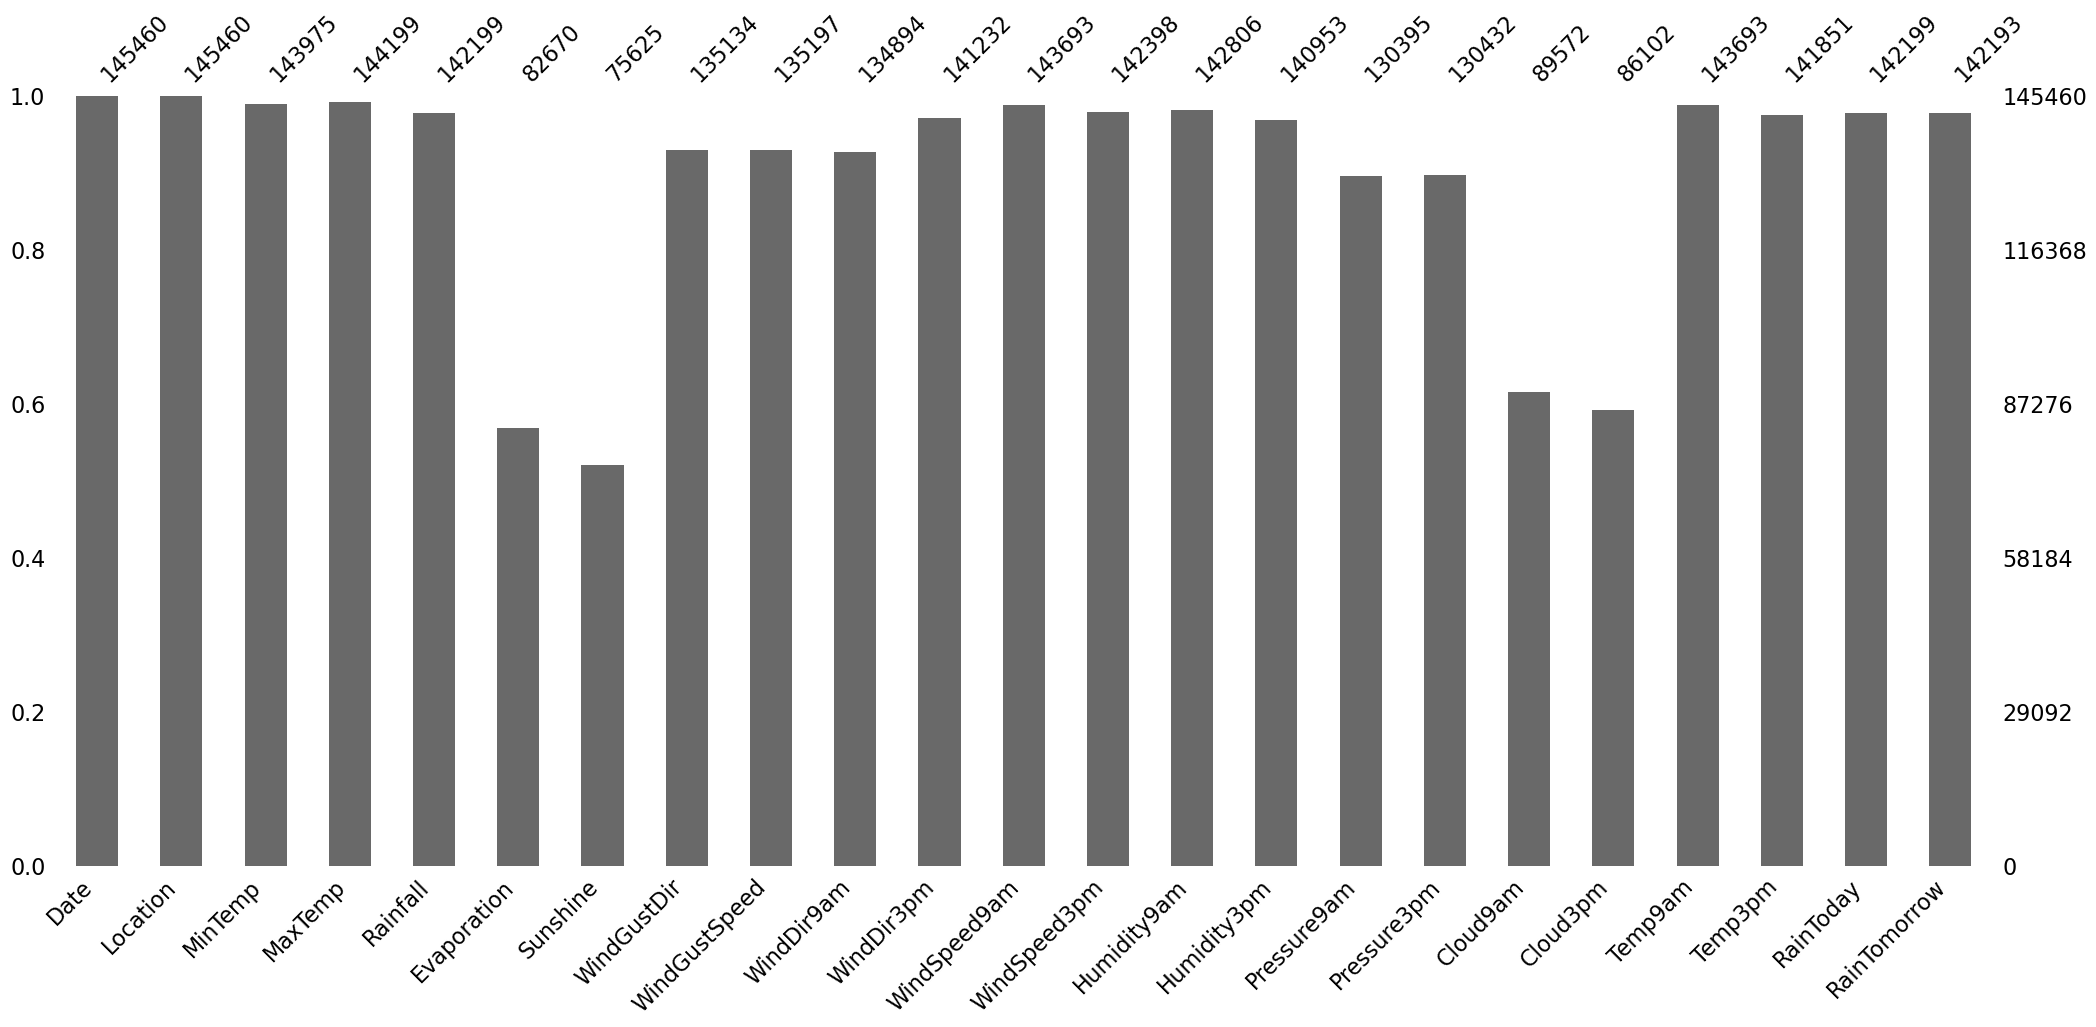

In [10]:
msno.bar(df)

<Axes: >

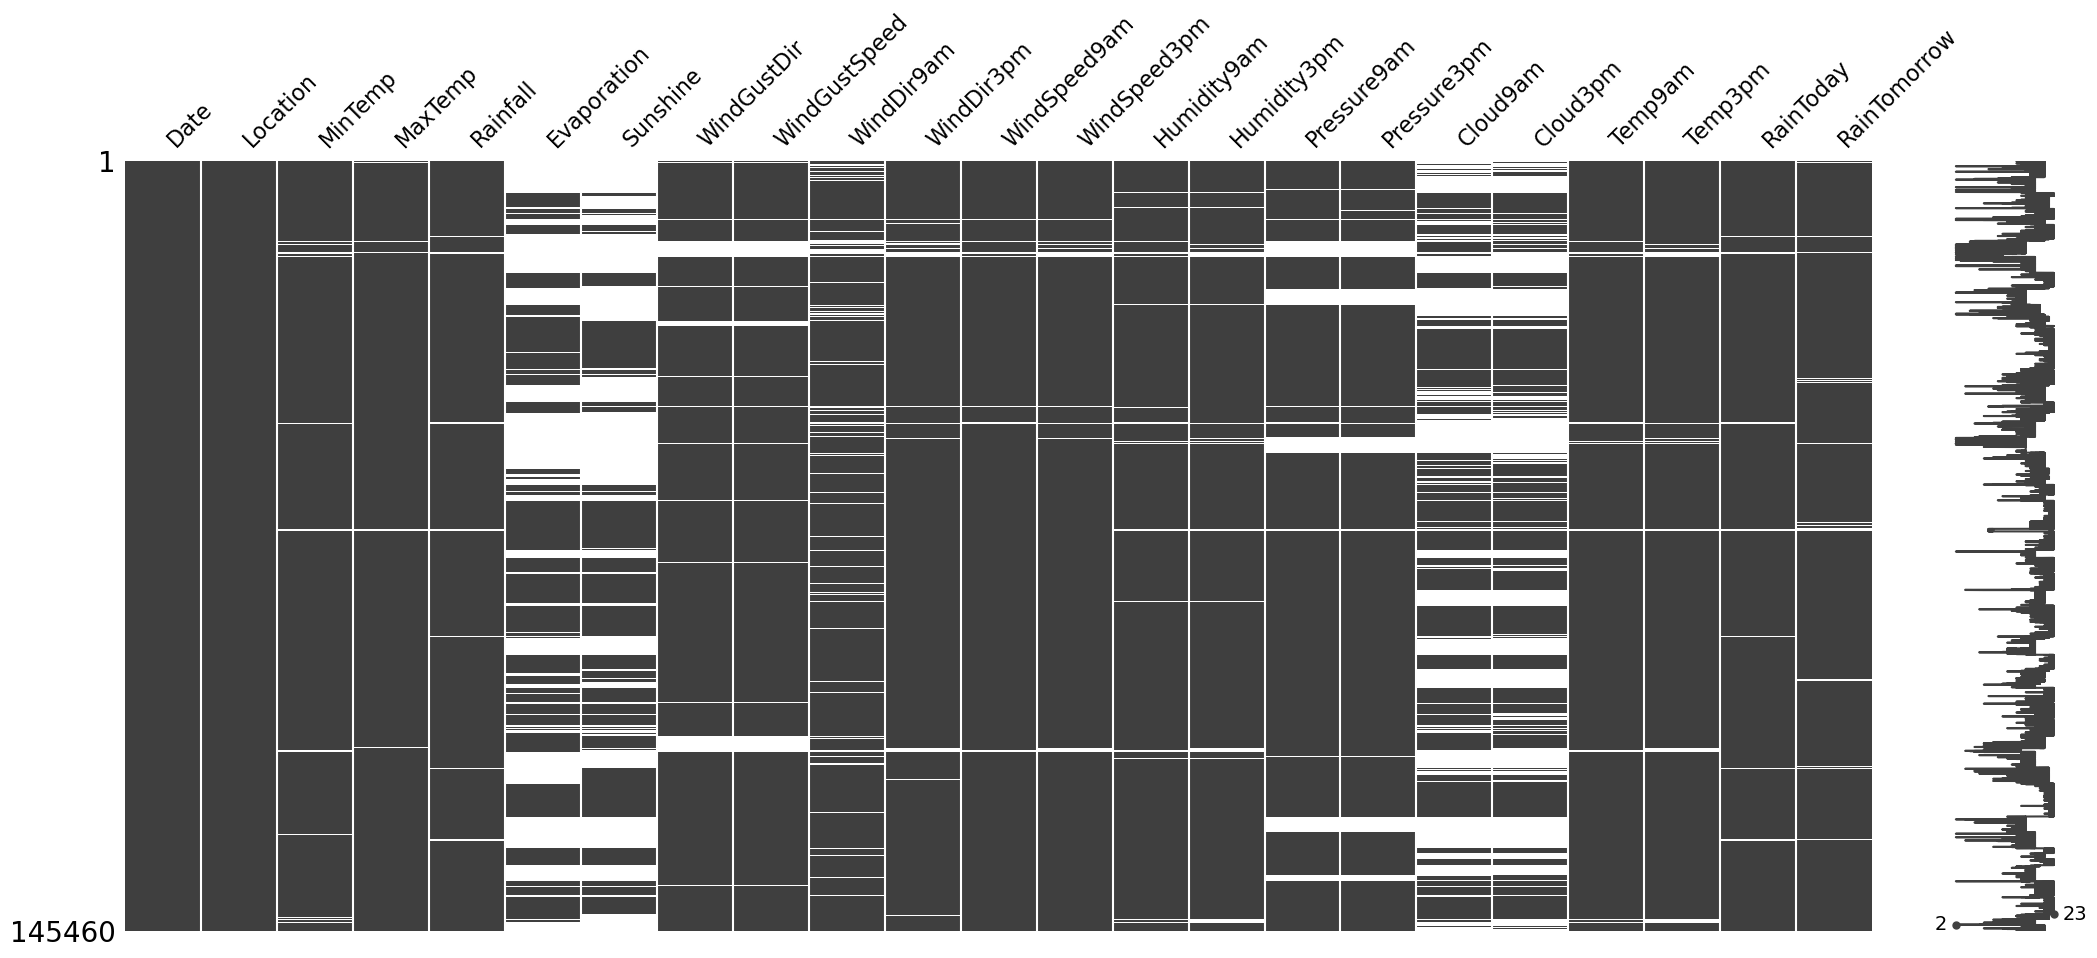

In [11]:
msno.matrix(df)

<Axes: >

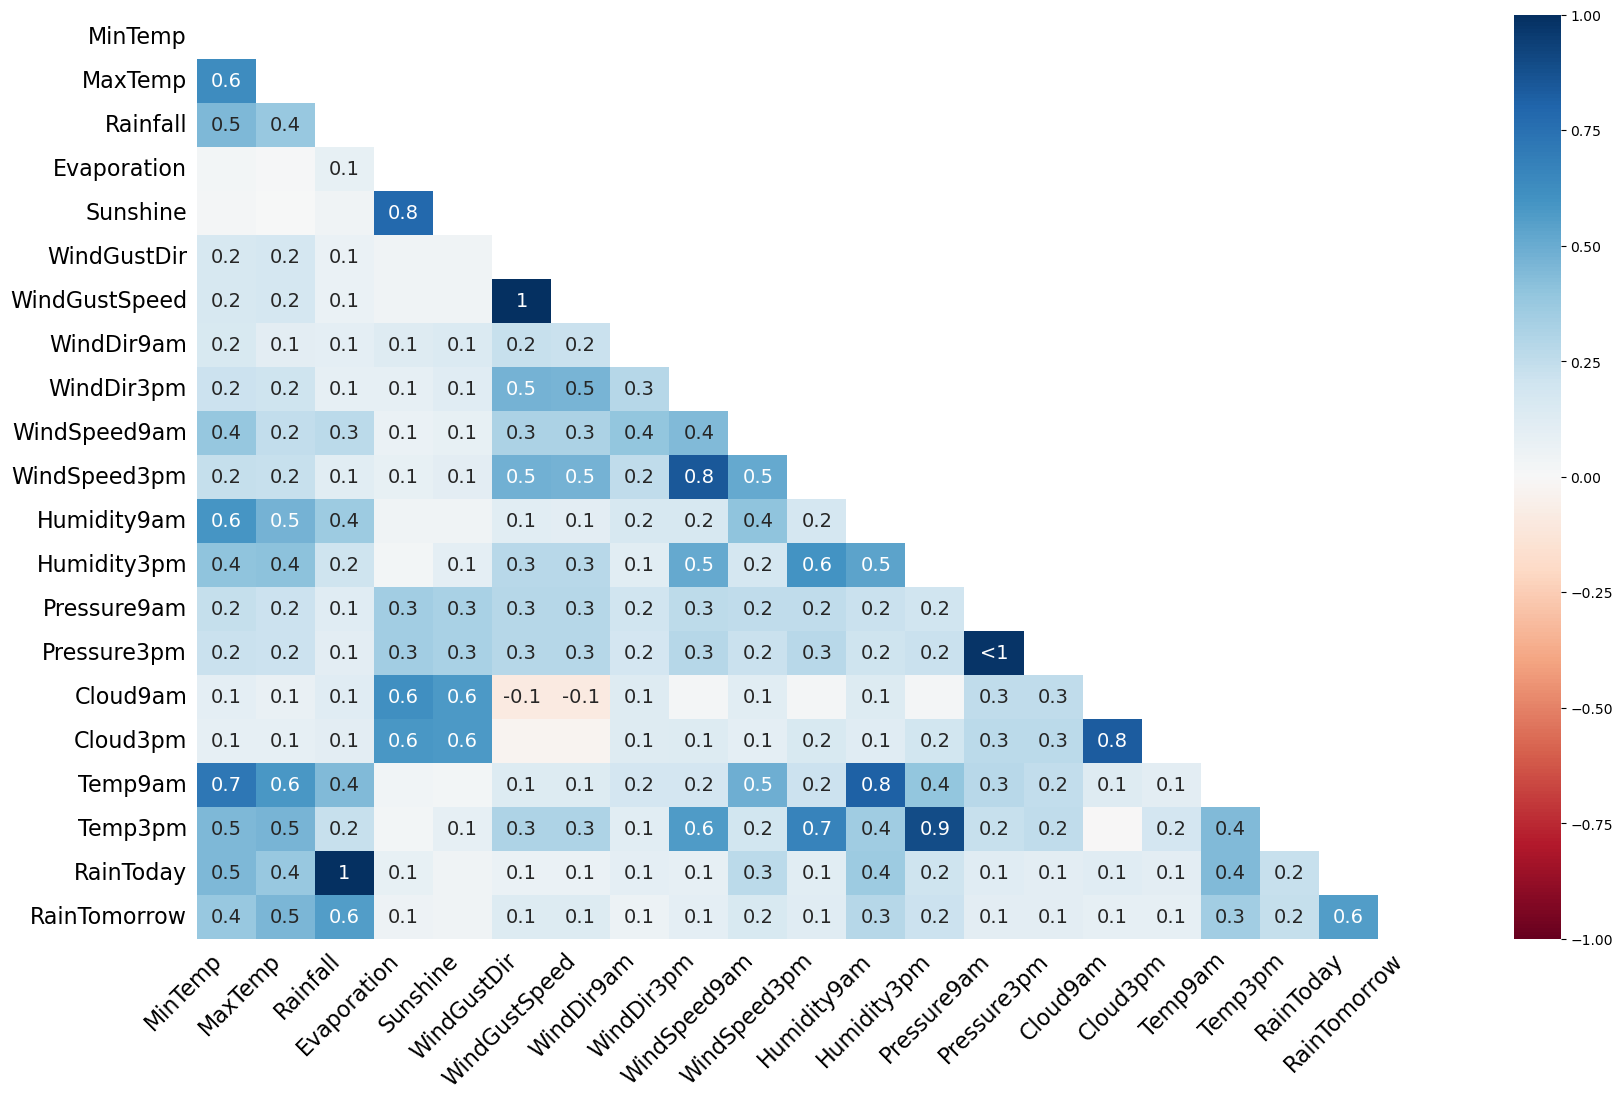

In [12]:
msno.heatmap(df)

In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df['percent_missing'] = missing_value_df['percent_missing'].round(2)

print(missing_value_df)

               percent_missing
Date                      0.00
Location                  0.00
MinTemp                   1.02
MaxTemp                   0.87
Rainfall                  2.24
Evaporation              43.17
Sunshine                 48.01
WindGustDir               7.10
WindGustSpeed             7.06
WindDir9am                7.26
WindDir3pm                2.91
WindSpeed9am              1.21
WindSpeed3pm              2.11
Humidity9am               1.82
Humidity3pm               3.10
Pressure9am              10.36
Pressure3pm              10.33
Cloud9am                 38.42
Cloud3pm                 40.81
Temp9am                   1.21
Temp3pm                   2.48
RainToday                 2.24
RainTomorrow              2.25


The data contain large numbers of missing values.

#### Coping the the dataframe

In [14]:
df1 = df.copy()
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Handling missing values.

**MinTemp**

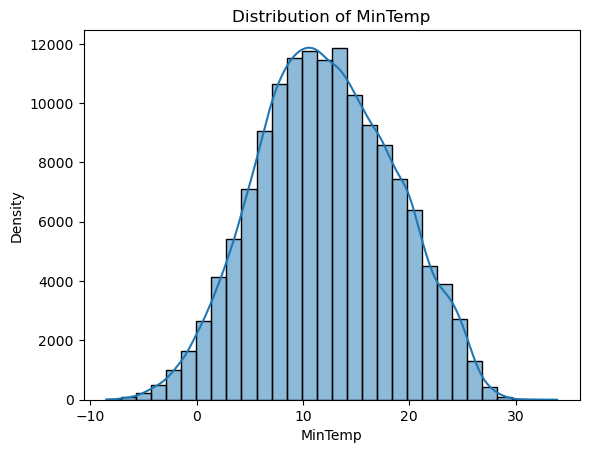

In [15]:
sns.histplot(df1['MinTemp'], bins=30, kde=True)
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Density')
plt.show()

The distribution of "MinTemp" appeats to symmetric and centered around 10 to 15 degrees Celsius. We can use mean imputation for the missing values. 

In [16]:
df1['MinTemp'].fillna(df1['MinTemp'].mean(), inplace=True)

Post imputation distribution

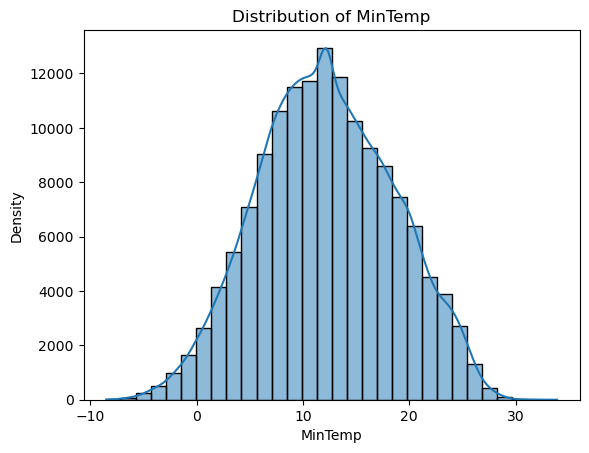

In [17]:
sns.histplot(df1['MinTemp'], bins=30, kde=True)
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Density')
plt.show()

#### MaxTemp

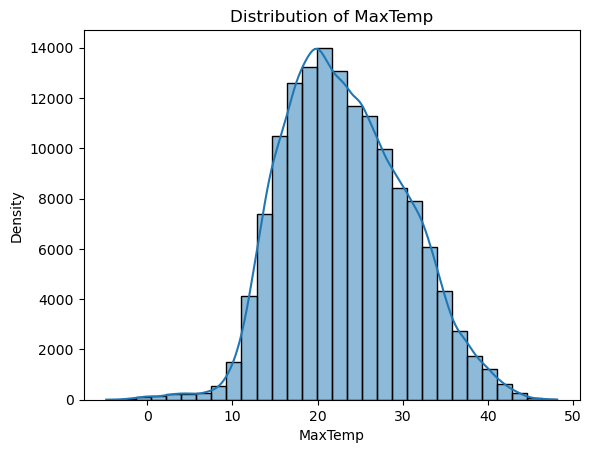

In [18]:
sns.histplot(df1['MaxTemp'], bins=30, kde=True)
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Density')
plt.show()

In [19]:
df1['MaxTemp'].fillna(df1['MaxTemp'].mean(), inplace=True)

Post imputation distrbution.

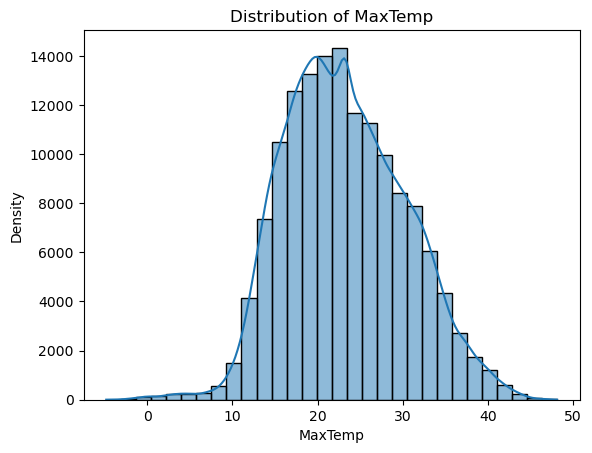

In [20]:
sns.histplot(df1['MaxTemp'], bins=30, kde=True)
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Density')
plt.show()

#### Rainfall

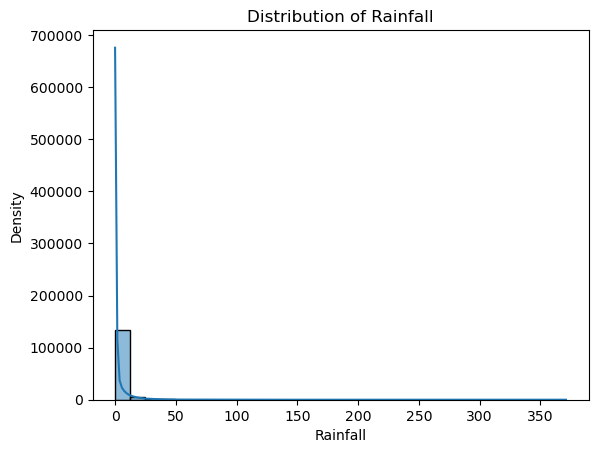

In [21]:
sns.histplot(df1['Rainfall'], bins=30, kde=True)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')
plt.show()

The Rainfall show a highly skewed distribution with most values clustered near zero and few extreme higher values. This shows that most days recieved little to no rain, with occasional days expericing higher rainfall.

In [22]:
missing_rainfall = df1[df1['Rainfall'].isnull()]
missing_rainfall

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.800000,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,12.194034,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.700000,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.500000,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,12.194034,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144951,2016-02-03,Uluru,20.600000,32.6,NaN,NaN,NaN,S,39.0,SE,NE,24.0,13.0,50.0,32.0,1011.5,1008.7,NaN,NaN,22.6,30.0,NaN,No
144956,2016-02-08,Uluru,23.800000,38.3,NaN,NaN,NaN,NaN,NaN,ESE,ESE,17.0,26.0,27.0,16.0,1015.2,1010.8,NaN,NaN,30.6,36.1,NaN,No
145092,2016-06-23,Uluru,14.200000,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,9.0,NaN,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145093,2016-06-24,Uluru,3.200000,17.9,NaN,NaN,NaN,E,44.0,SE,E,11.0,20.0,83.0,39.0,1022.4,1019.0,NaN,NaN,8.8,17.2,NaN,No


If we assume missing values indicate no recorded rainfall, than filling the missing values with zero can be the effective approach.

In [23]:
df1['Rainfall'].fillna(0, inplace=True)

#### Evaporation

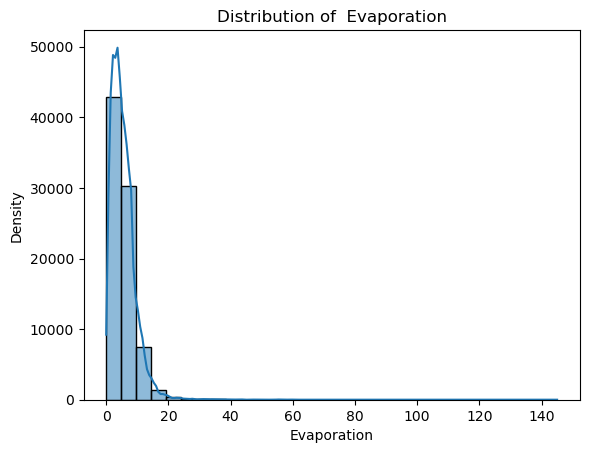

In [24]:
sns.histplot(df1['Evaporation'], bins=30, kde=True)
plt.title('Distribution of  Evaporation')
plt.xlabel('Evaporation')
plt.ylabel('Density')
plt.show()

Distribution of Evaporation shows a **strong positive skew**. Majorty of the data is clustered near lower values, with some higher values.

We will first impute missing values by using **median grouping them with location** and then remainin missing values by using ovarall median.

In [25]:
df1['Evaporation'] = df1.groupby('Location')['Evaporation'].transform(lambda x: x.fillna(x.median()))

In [26]:
overall_evap_median = df1['Evaporation'].median()
df1['Evaporation'].fillna(overall_evap_median, inplace=True)

Post impute distribution of Evaporation

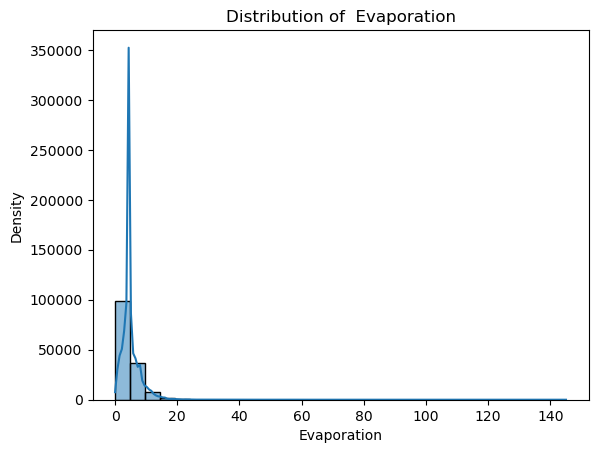

In [27]:
sns.histplot(df1['Evaporation'], bins=30, kde=True)
plt.title('Distribution of  Evaporation')
plt.xlabel('Evaporation')
plt.ylabel('Density')
plt.show()

This shows a strong peak at lower values, indicating that the imputation has not drastically change the shape the shape of distribution. The median imputation has effectively preserved the original data characteristics despite the high level of missing data

#### Sunshine

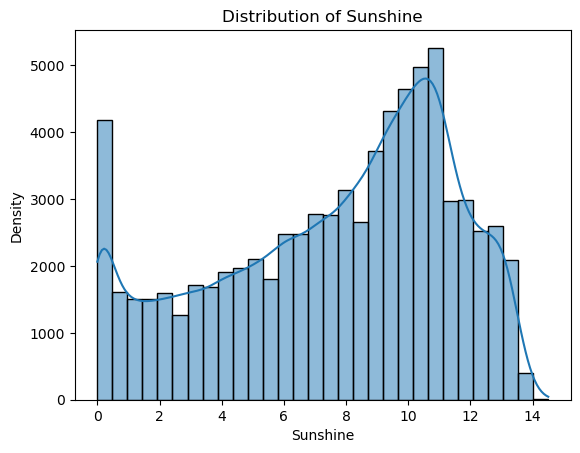

In [28]:
sns.histplot(df1['Sunshine'], bins=30, kde=True)
plt.title('Distribution of Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Density')
plt.show()

Distribution of Sunshine appears **roughly normal but skewed slihtly to the right**, suggesting most days have moderate to high amount of sunshine, with fewer days having very low sunshine hours.

We will use **mean grouped by location** to fill missing values. we will fill the remaining missing values by usin overall mean.

In [29]:
df1['Sunshine'] = df1.groupby('Location')['Sunshine'].transform(lambda x: x.fillna(x.mean()))

In [30]:
overall_sun_mean = df1['Sunshine'].mean()
df1['Sunshine'].fillna(overall_sun_mean, inplace=True)

post impute distribution of Sunshine

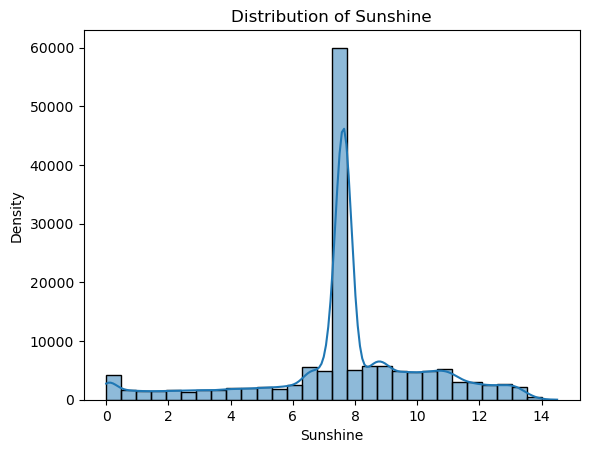

In [31]:
sns.histplot(df1['Sunshine'], bins=30, kde=True)
plt.title('Distribution of Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Density')
plt.show()

After imputation Sunshine show a normal-like distribution centered around a peak, which chould be around 9-10 hours. This is a realistic representation of average sunshine hours per day.

#### WindGustDir

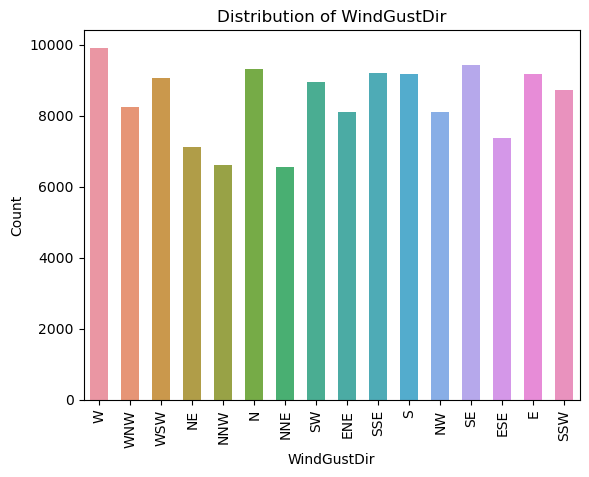

In [32]:
sns.countplot(x='WindGustDir', data=df1, width=0.6)
plt.title('Distribution of WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [33]:
mode_windgustdir_by_location = df1.groupby('Location')['WindGustDir'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(f'Mode of WindGusDir by {mode_windgustdir_by_location}')

Mode of WindGusDir by Location
Adelaide             WSW
Albany              None
Albury                 W
AliceSprings         ESE
BadgerysCreek         SW
Ballarat               N
Bendigo              SSE
Brisbane               E
Cairns                SE
Canberra              NW
Cobar                 SW
CoffsHarbour          NE
Dartmoor             SSW
Darwin                 E
GoldCoast            SSE
Hobart               NNW
Katherine              E
Launceston           NNW
Melbourne              N
MelbourneAirport       N
Mildura              SSW
Moree                NNE
MountGambier           S
MountGinini            W
Newcastle           None
Nhil                   W
NorahHead              S
NorfolkIsland          E
Nuriootpa             SE
PearceRAAF             E
Penrith               SE
Perth                 SW
PerthAirport           E
Portland               W
Richmond              SE
Sale                   W
SalmonGums           SSW
Sydney                 W
SydneyAirport      

In [34]:
df1['WindGustDir'] = df1.apply(
    lambda row: mode_windgustdir_by_location[row['Location']] if pd.isnull(row['WindGustDir']) else row['WindGustDir'],
    axis=1
)

In [35]:
df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0],inplace=True)

In [36]:
df1['WindGustDir'].value_counts()

WindGustDir
W      17570
SE      9726
E       9587
SSE     9450
N       9373
S       9326
WSW     9095
SW      9090
SSW     8931
NW      8461
WNW     8430
ENE     8155
NE      7540
ESE     7423
NNW     6677
NNE     6626
Name: count, dtype: int64

Post fill missin values.

#### WindGustSpeed

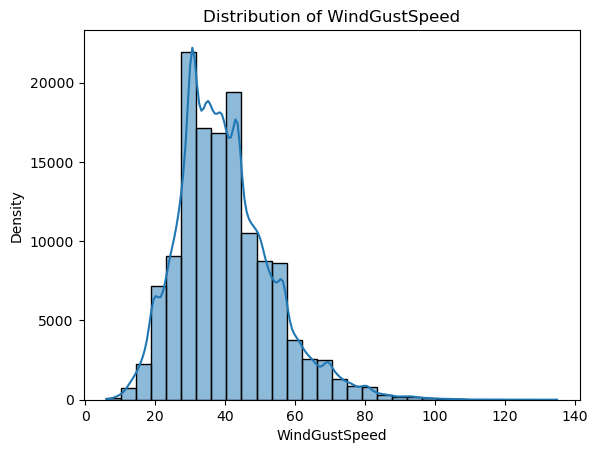

In [37]:
sns.histplot(df1['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribution of WindGustSpeed')
plt.xlabel('WindGustSpeed')
plt.ylabel('Density')
plt.show()

The data is somewhat normally distributed with a right skew. This skewness show higher gust speeds are less common.

As the distribution is right skewed, we can use **median by location** to fill the missin values.

In [38]:
# Calculate the median WindGustSpeed for each location
median_windgustspeed_by_location = df1.groupby('Location')['WindGustSpeed'].median()
print(median_windgustspeed_by_location)

Location
Adelaide            35.0
Albany               NaN
Albury              31.0
AliceSprings        39.0
BadgerysCreek       31.0
Ballarat            44.0
Bendigo             37.0
Brisbane            28.0
Cairns              37.0
Canberra            39.0
Cobar               35.0
CoffsHarbour        37.0
Dartmoor            37.0
Darwin              39.0
GoldCoast           41.0
Hobart              44.0
Katherine           39.0
Launceston          35.0
Melbourne           43.0
MelbourneAirport    44.0
Mildura             35.0
Moree               37.0
MountGambier        41.0
MountGinini         43.0
Newcastle            NaN
Nhil                41.0
NorahHead           41.0
NorfolkIsland       41.0
Nuriootpa           39.0
PearceRAAF          43.0
Penrith             30.0
Perth               35.0
PerthAirport        43.0
Portland            39.0
Richmond            33.0
Sale                39.0
SalmonGums          39.0
Sydney              41.0
SydneyAirport       46.0
Townsville      

In [39]:
df1['WindGustSpeed'] = df1.apply(
    lambda row: median_windgustspeed_by_location[row['Location']] if pd.isnull(row['WindGustSpeed']) else row['WindGustSpeed'],
    axis=1
)

In [40]:
df1['WindGustSpeed'].isna().sum()

6079

Filling remaining missing values by overall median.

In [41]:
df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median(), inplace=True)

Post imputation distribution.

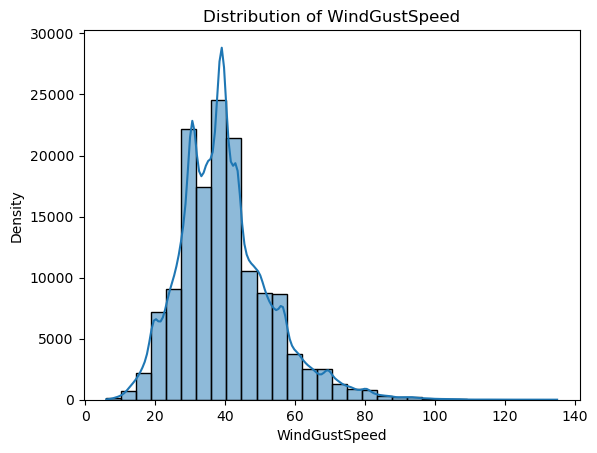

In [42]:
sns.histplot(df1['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribution of WindGustSpeed')
plt.xlabel('WindGustSpeed')
plt.ylabel('Density')
plt.show()

WindGustSpeed after imputation shows a much more normalized distribution. This indicates a successful adjustment of the imputation technique, resulting in a bell-shaped curve which is typical for wind speed distributions. The dual peaks around 40 and 50 km/h suggest that these are common gust speeds, while the decrease in frequency at higher speeds reflects realistic wind behavior.

#### WindDir9am

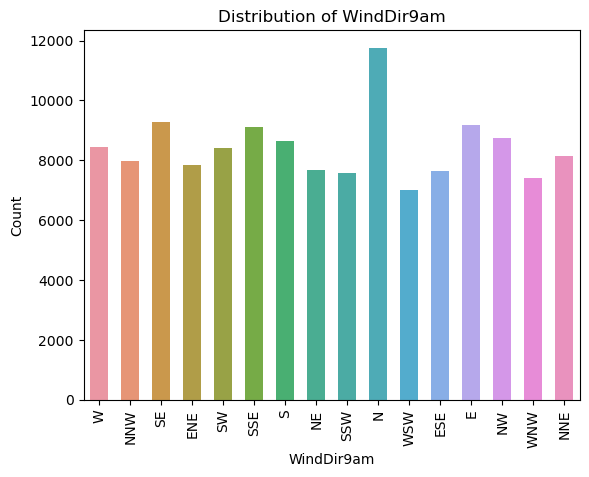

In [43]:
sns.countplot(x='WindDir9am', data=df1, width=0.6)
plt.title('Distribution of WindDir9am')
plt.xlabel('WindDir9am')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [44]:
df1['WindDir9am'].isna().sum()

10566

In [45]:
df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)

In [46]:
df1['WindDir9am'].isna().sum()

0

In [47]:
df1['WindDir9am'].value_counts()

WindDir9am
N      22324
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

#### WindDir3pm

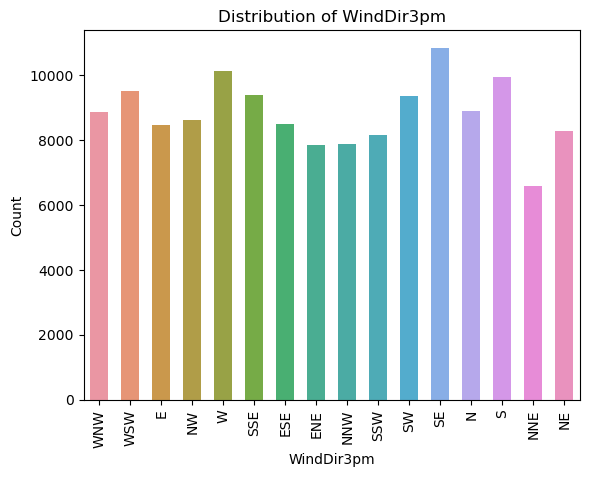

In [48]:
sns.countplot(x='WindDir3pm', data=df1, width=0.6)
plt.title('Distribution of WindDir3pm')
plt.xlabel('WindDir3pm')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [49]:
df1['WindDir3pm'].isna().sum()

4228

In [50]:
df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)

In [51]:
df1['WindDir3pm'].value_counts()

WindDir3pm
SE     15066
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

#### WindSpeed9am

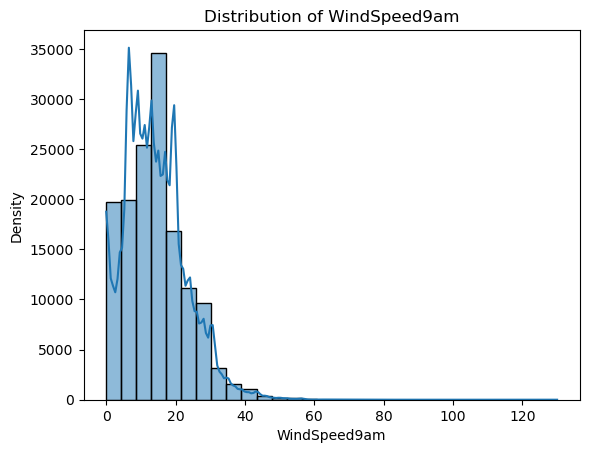

In [52]:
sns.histplot(df1['WindSpeed9am'], bins=30, kde=True)
plt.title('Distribution of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.ylabel('Density')
plt.show()

Concentration of values towards the lower end and a long tail extending to the right, indicating a positive skew. Mostly wind speeds at 9am are moderate, there are occasional higher speeds, likely on stormy days.

We can use the median WindSpeed9am specific to each location.

In [53]:
median_windspeed9am_by_location = df1.groupby('Location')['WindSpeed9am'].median()
df1['WindSpeed9am'] = df1.apply(
    lambda row: median_windspeed9am_by_location[row['Location']] if pd.isnull(row['WindSpeed9am']) else row['WindSpeed9am'],
    axis=1
)

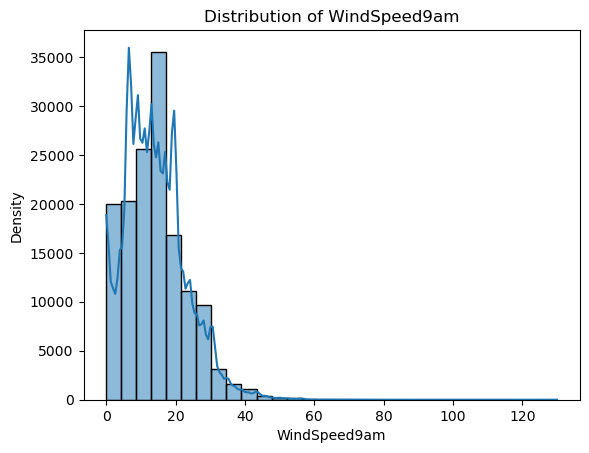

In [54]:
sns.histplot(df1['WindSpeed9am'], bins=30, kde=True)
plt.title('Distribution of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.ylabel('Density')
plt.show()

After imputation shows a more normalized distribution with a clear peak, suggesting that the median imputation by location has been effective

#### WindSpeed3pm

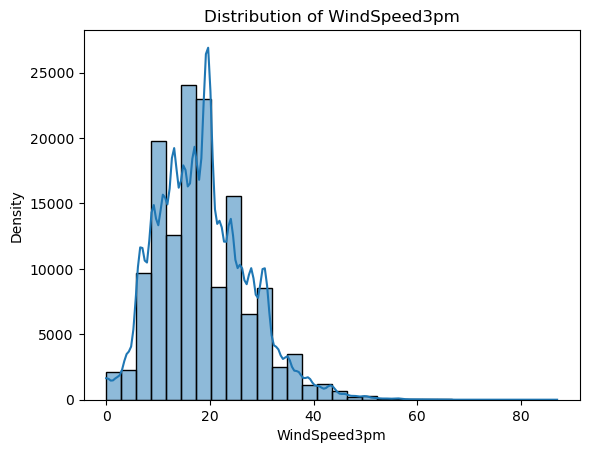

In [55]:
sns.histplot(df1['WindSpeed3pm'], bins=30, kde=True)
plt.title('Distribution of WindSpeed3pm')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Density')
plt.show()

WindSpeed3pm shows a similar distribution pattern to WindSpeed9am, with higher peak and somewhat broader spread.

We will use a location specific median imputation

In [56]:
median_windspeed3pm_by_location = df1.groupby('Location')['WindSpeed3pm'].median()
df1['WindSpeed3pm'] = df1.apply(
    lambda row: median_windspeed3pm_by_location[row['Location']] if pd.isnull(row['WindSpeed3pm']) else row['WindSpeed3pm'],
    axis=1
)

Post imputation distribution.

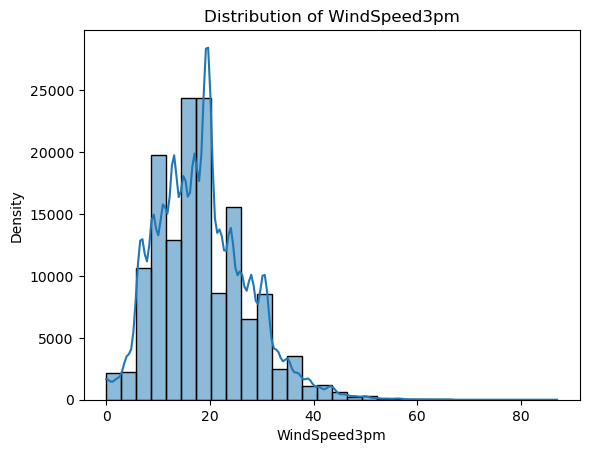

In [57]:
sns.histplot(df1['WindSpeed3pm'], bins=30, kde=True)
plt.title('Distribution of WindSpeed3pm')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Density')
plt.show()

#### Humidity9am

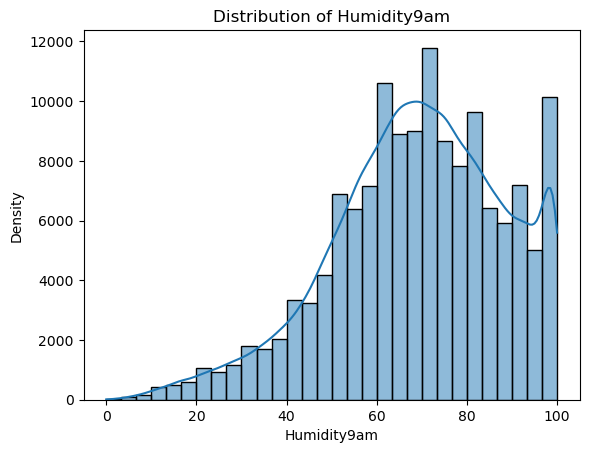

In [58]:
sns.histplot(df1['Humidity9am'], bins=30, kde=True)
plt.title('Distribution of Humidity9am')
plt.xlabel('Humidity9am')
plt.ylabel('Density')
plt.show()

Show left skew with higher concentration of values towards the higher end of scale. Most values are clustered above 40%, which suggests morning times are generally more humid.

We will use location specific medain imputation.

In [59]:
median_humidity9am_by_location = df1.groupby('Location')['Humidity9am'].median()
df1['Humidity9am'] = df1.apply(
    lambda row: median_humidity9am_by_location[row['Location']] if pd.isnull(row['Humidity9am']) else row['Humidity9am'],
    axis=1
)


In [60]:
df1['Humidity9am'].isna().sum()

0

Post imputation distribution.

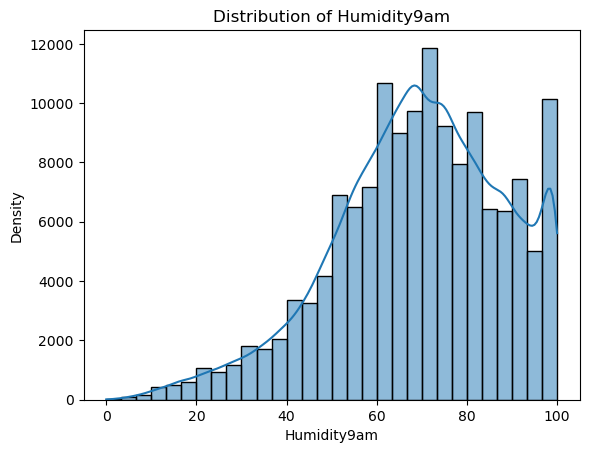

In [61]:
sns.histplot(df1['Humidity9am'], bins=30, kde=True)
plt.title('Distribution of Humidity9am')
plt.xlabel('Humidity9am')
plt.ylabel('Density')
plt.show()

#### Humidity3pm

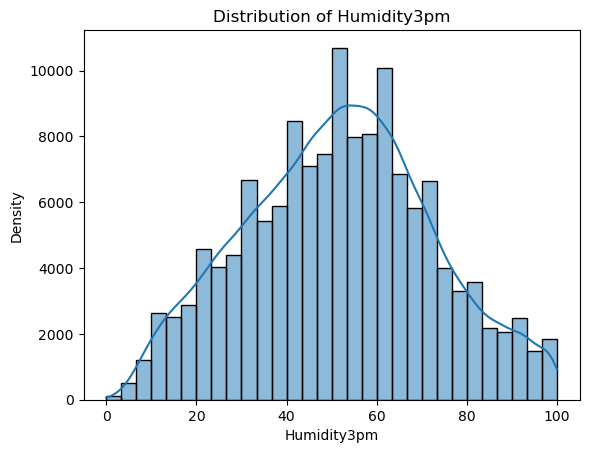

In [62]:
sns.histplot(df1['Humidity3pm'], bins=30, kde=True)
plt.title('Distribution of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Density')
plt.show()

Shows more symmetric but slighty skewed to the left, indicating that afternoon humidity levels are usually lower than in the morning, with a broad spread across the range.

We will use location specific medain imputation.

In [63]:
median_humidity3pm_by_location = df1.groupby('Location')['Humidity3pm'].median()
df1['Humidity3pm'] = df1.apply(
    lambda row: median_humidity3pm_by_location[row['Location']] if pd.isnull(row['Humidity3pm']) else row['Humidity3pm'],
    axis=1
)

Post imputation distribution.

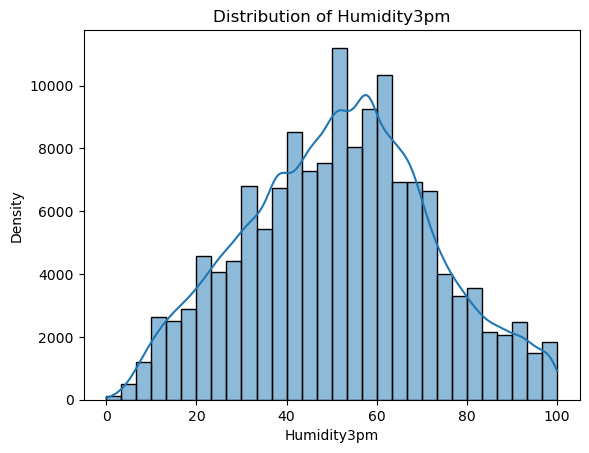

In [64]:
sns.histplot(df1['Humidity3pm'], bins=30, kde=True)
plt.title('Distribution of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Density')
plt.show()

#### Pressure9am

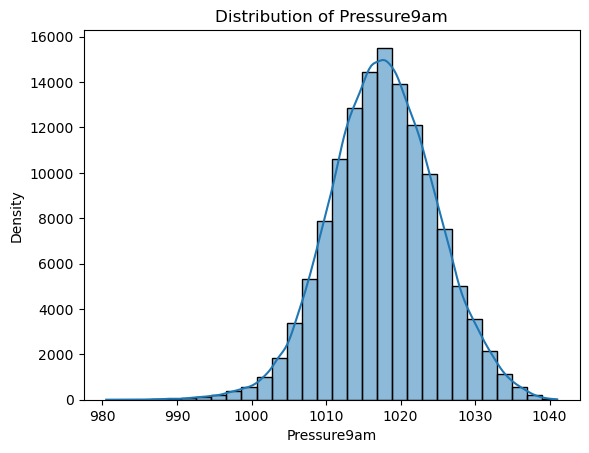

In [65]:
sns.histplot(df1['Pressure9am'], bins=30, kde=True)
plt.title('Distribution of Pressure9am')
plt.xlabel('Pressure9am')
plt.ylabel('Density')
plt.show()

This distribution is well-centered around the mean values, indicating minimal skew.

Using a location-specific mean imputation

In [66]:
df1['Pressure9am'].fillna(df1['Pressure9am'].mean(), inplace=True)

In [67]:
df1['Pressure9am'].isna().sum()

0

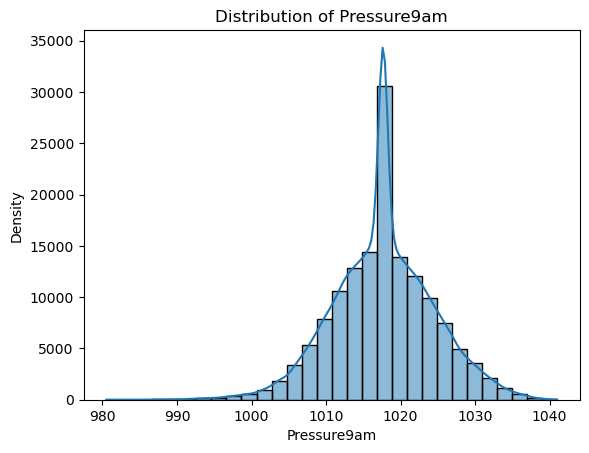

In [68]:
sns.histplot(df1['Pressure9am'], bins=30, kde=True)
plt.title('Distribution of Pressure9am')
plt.xlabel('Pressure9am')
plt.ylabel('Density')
plt.show()

#### Pressure3pm

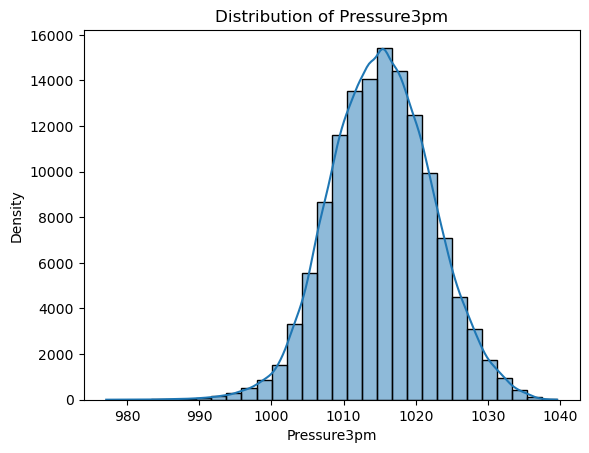

In [69]:
sns.histplot(df1['Pressure3pm'], bins=30, kde=True)
plt.title('Distribution of Pressure3pm')
plt.xlabel('Pressure3pm')
plt.ylabel('Density')
plt.show()

This distribution is well-centered around the mean values, indicating minimal skew Using a location-specific mean imputation

In [70]:
df1['Pressure3pm'].fillna(df1['Pressure3pm'].mean(), inplace=True)

In [71]:
df1['Pressure9am'].isna().sum()

0

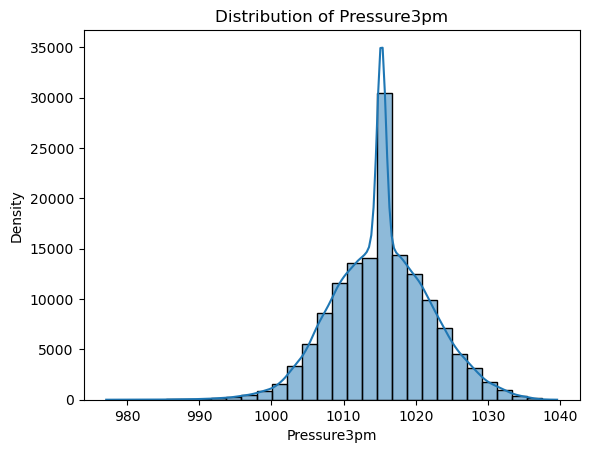

In [72]:
sns.histplot(df1['Pressure3pm'], bins=30, kde=True)
plt.title('Distribution of Pressure3pm')
plt.xlabel('Pressure3pm')
plt.ylabel('Density')
plt.show()

#### Cloud9am and Cloud3pm

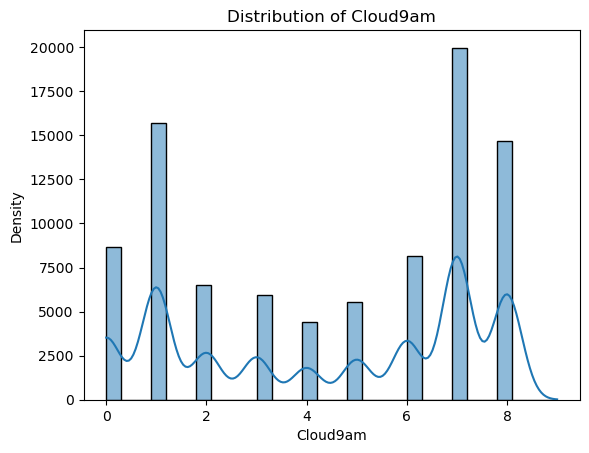

In [73]:
sns.histplot(df1['Cloud9am'], bins=30, kde=True)
plt.title('Distribution of Cloud9am')
plt.xlabel('Cloud9am')
plt.ylabel('Density')
plt.show()

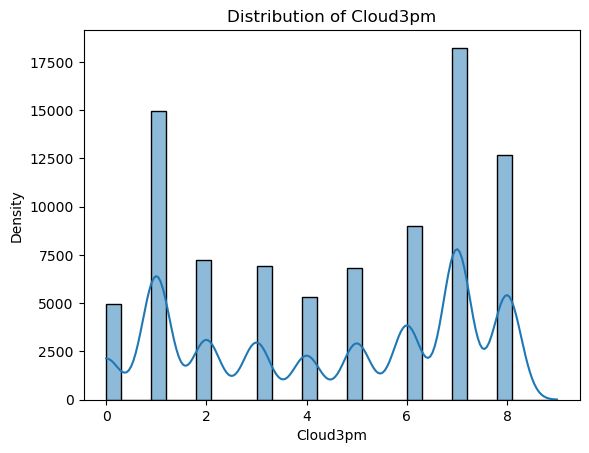

In [74]:
sns.histplot(df1['Cloud3pm'], bins=30, kde=True)
plt.title('Distribution of Cloud3pm')
plt.xlabel('Cloud3pm')
plt.ylabel('Density')
plt.show()

The distributions of Cloud9am and Cloud3pm show clear patterns, with peaks at specific values (0, 1, ..., 8) that correspond to the okta scale (a measure of cloud cover). The data has distinct peaks at values indicating clear sky (0), half coverage (4, 5), and full coverage (8), which is common in weather data reporting cloud cover.



In [75]:
# Probabilistic Imputation for Cloud9am
cloud9am_counts = df1['Cloud9am'].value_counts(normalize=True)
cloud9am_probs = cloud9am_counts / cloud9am_counts.sum()
missing_cloud9am = df1['Cloud9am'].isnull()
df1.loc[missing_cloud9am, 'Cloud9am'] = np.random.choice(cloud9am_probs.index,
                                                          size=missing_cloud9am.sum(),
                                                          p=cloud9am_probs.values)

# Probabilistic Imputation for Cloud3pm
cloud3pm_counts = df1['Cloud3pm'].value_counts(normalize=True)
cloud3pm_probs = cloud3pm_counts / cloud3pm_counts.sum()
missing_cloud3pm = df1['Cloud3pm'].isnull()
df1.loc[missing_cloud3pm, 'Cloud3pm'] = np.random.choice(cloud3pm_probs.index,
                                                          size=missing_cloud3pm.sum(),
                                                          p=cloud3pm_probs.values)

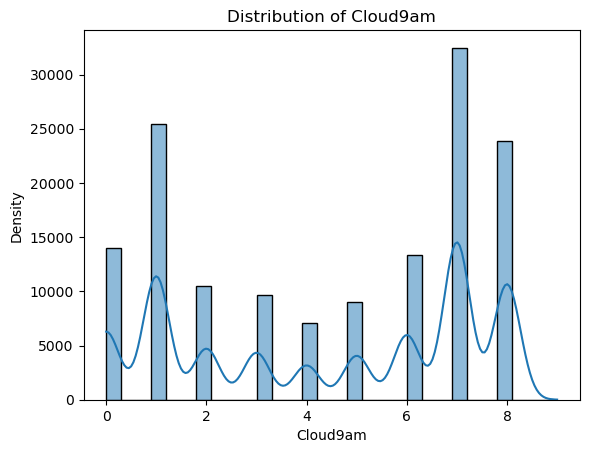

In [76]:
sns.histplot(df1['Cloud9am'], bins=30, kde=True)
plt.title('Distribution of Cloud9am')
plt.xlabel('Cloud9am')
plt.ylabel('Density')
plt.show()

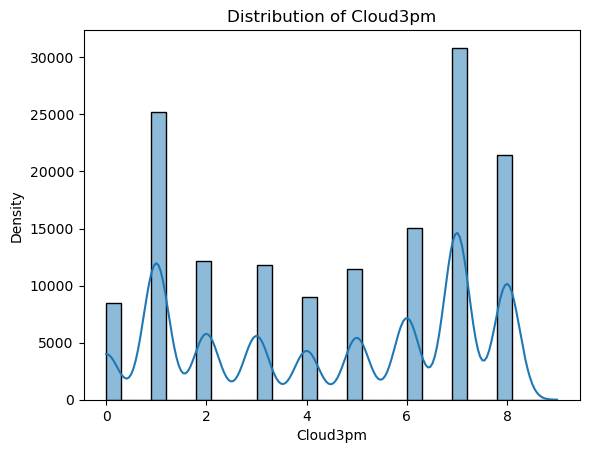

In [77]:
sns.histplot(df1['Cloud3pm'], bins=30, kde=True)
plt.title('Distribution of Cloud3pm')
plt.xlabel('Cloud3pm')
plt.ylabel('Density')
plt.show()

#### Temp9am and Temp3pm

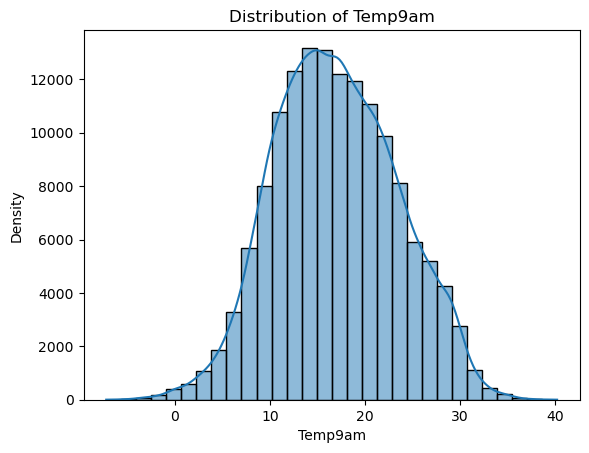

In [78]:
sns.histplot(df1['Temp9am'], bins=30, kde=True)
plt.title('Distribution of Temp9am')
plt.xlabel('Temp9am')
plt.ylabel('Density')
plt.show()

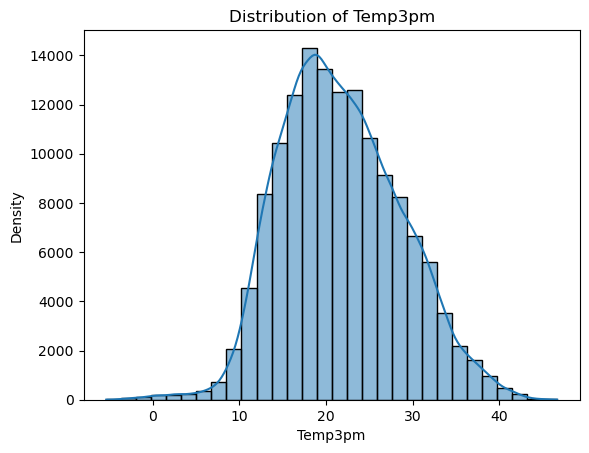

In [79]:
sns.histplot(df1['Temp3pm'], bins=30, kde=True)
plt.title('Distribution of Temp3pm')
plt.xlabel('Temp3pm')
plt.ylabel('Density')
plt.show()

The histograms for Temp9am and Temp3pm show normal distributions with a bell-shaped curve, which is typical for temperature data. Given the small percentage of missing data (around 2.24% and 2.25% respectively), the imputation method should ideally maintain this distribution without introducing bias.

In [80]:
mean_temp9am = df1['Temp9am'].mean()
mean_temp3pm = df1['Temp3pm'].mean()

df1['Temp9am'].fillna(mean_temp9am, inplace=True)
df1['Temp3pm'].fillna(mean_temp3pm, inplace=True)

#### RainToday and RainTomorrow

Given the relatively small percentage of missing values (around 2.24% and 2.25%), We are impute it.

In [81]:
df1['RainToday'].fillna(df1['RainToday'].mode()[0],inplace=True)
df1['RainTomorrow'].fillna(df1['RainTomorrow'].mode()[0],inplace=True)

In [82]:
df1.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

               percent_missing
Date                       0.0
Location                   0.0
MinTemp                    0.0
MaxTemp                    0.0
Rainfall                   0.0
Evaporation                0.0
Sunshine                   0.0
WindGustDir                0.0
WindGustSpeed              0.0
WindDir9am                 0.0
WindDir3pm                 0.0
WindSpeed9am               0.0
WindSpeed3pm               0.0
Humidity9am                0.0
Humidity3pm                0.0
Pressure9am                0.0
Pressure3pm                0.0
Cloud9am                   0.0
Cloud3pm                   0.0
Temp9am                    0.0
Temp3pm                    0.0
RainToday                  0.0
RainTomorrow               0.0


<Axes: >

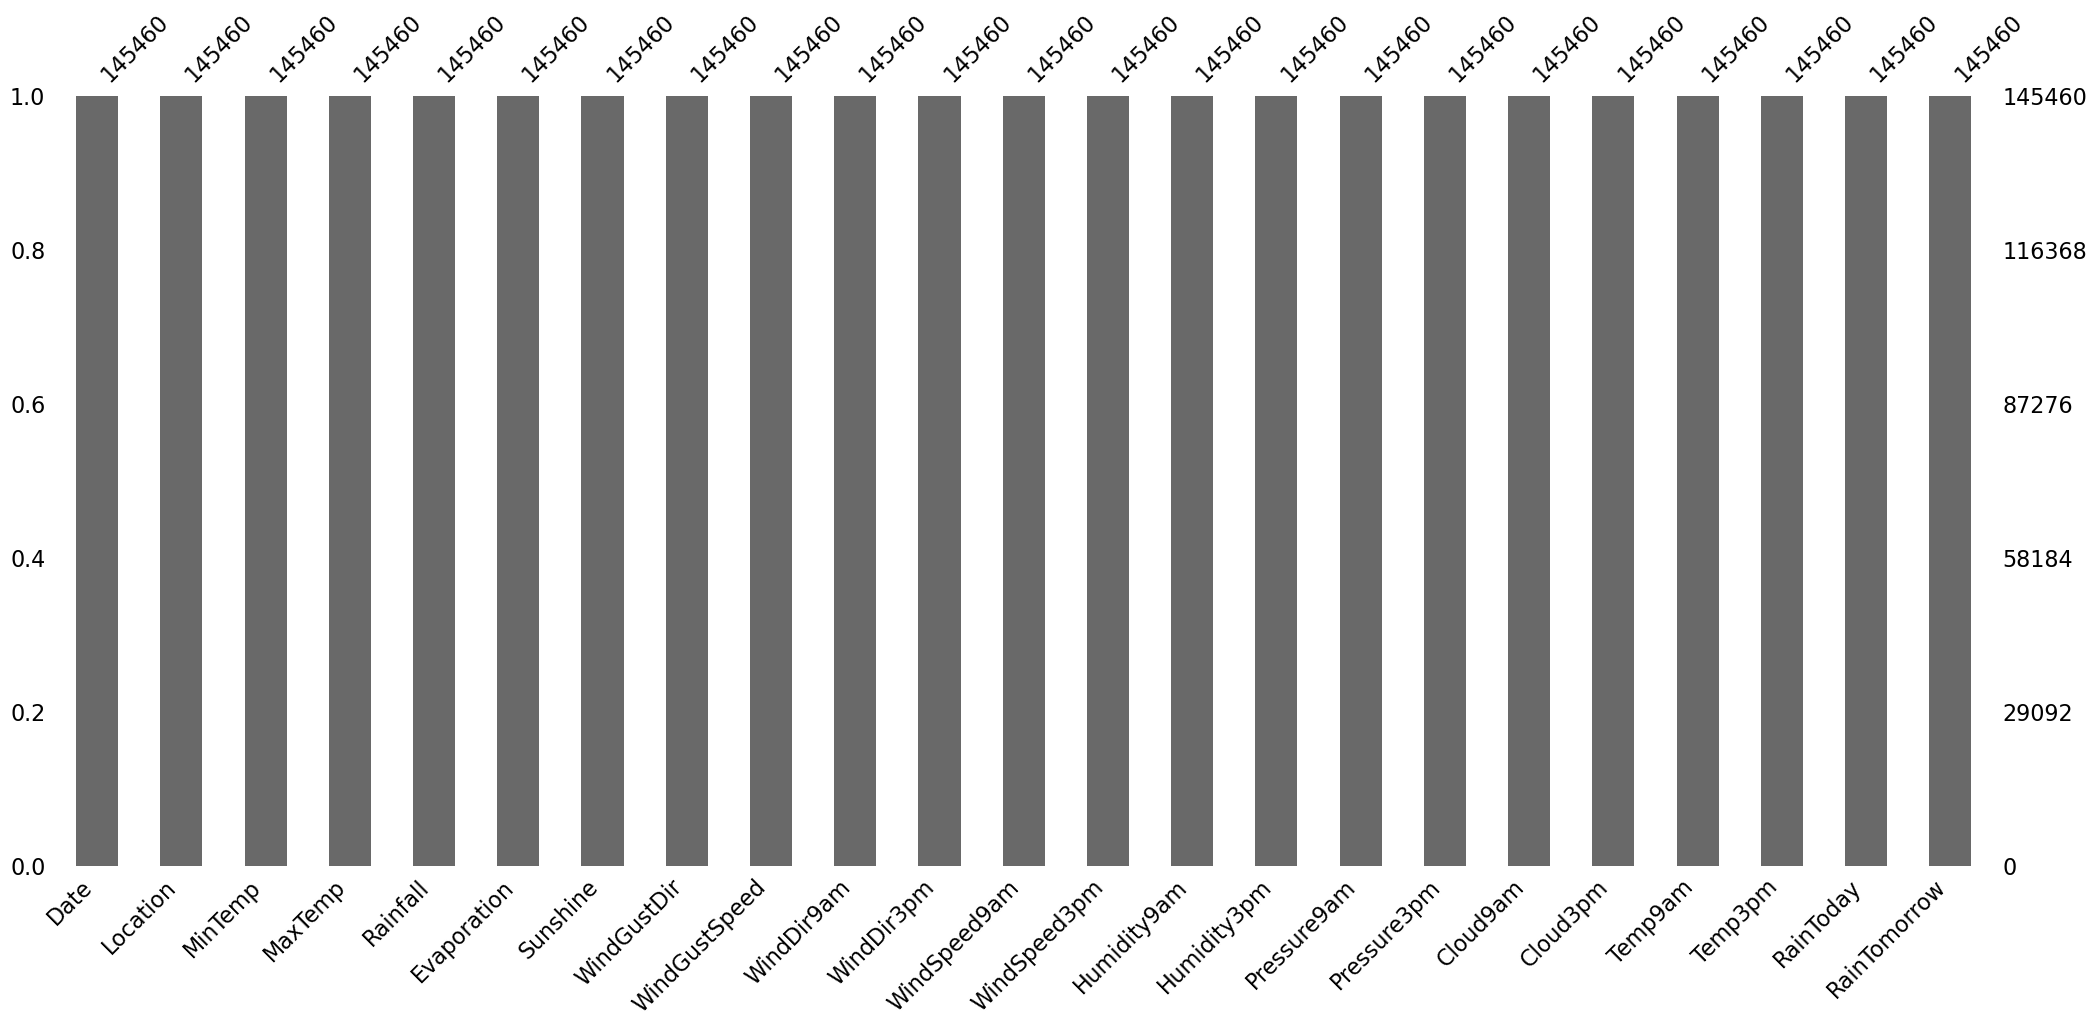

In [83]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df['percent_missing'] = missing_value_df['percent_missing'].round(2)

print(missing_value_df)
msno.bar(df1)

<Axes: >

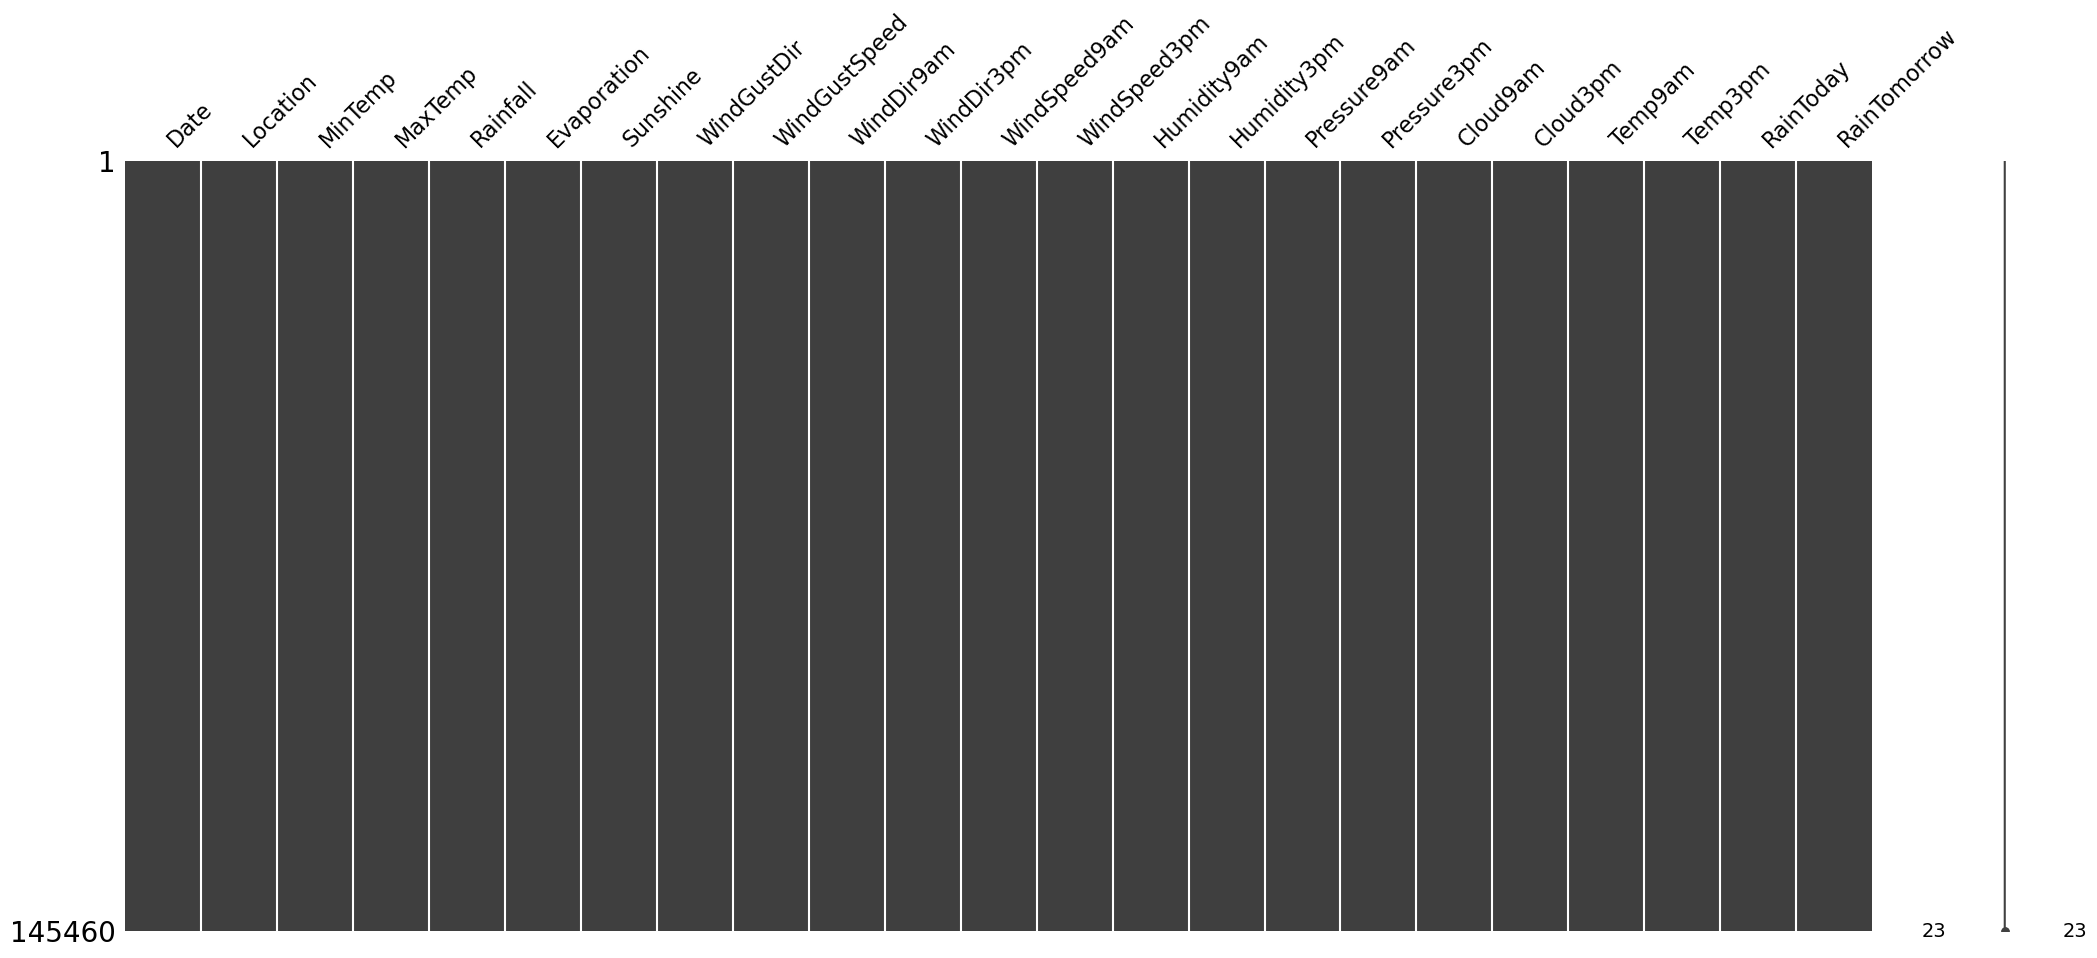

In [84]:
msno.matrix(df1)

#### Data Type Conversion

In [85]:
df1.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

#### Date

In [86]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [87]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

In [88]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,4.4,7.636766,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,4.4,7.636766,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,3.0,8.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,4.4,7.636766,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,4.4,7.636766,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,8.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,4.4,7.636766,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Outlier Detection:

In [89]:
def detect_outliers_z_score(df, threshold=3):
    numerical_cols = df.select_dtypes(include=['number'])
    z_scores = (numerical_cols - numerical_cols.mean()) / numerical_cols.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

numerical_df1 = df1.select_dtypes(include=['number'])

outliers_df1_zscore = detect_outliers_z_score(numerical_df1)

print("Number of rows with outliers in numerical columns (Z-score method):", outliers_df1_zscore.sum())

Number of rows with outliers in numerical columns (Z-score method): 8959


In [90]:
numerical_df1 = df1.select_dtypes(include=['number'])
mean = numerical_df1.mean()
std = numerical_df1.std()

z_scores = (numerical_df1 - mean) / std

print("Z-scores for each numerical column:")
print(z_scores)

outliers_df1 = numerical_df1[(np.abs(z_scores) > 3).any(axis=1)]

print("Number of rows with outliers in numerical columns:", len(outliers_df1))

Z-scores for each numerical column:
         MinTemp       MaxTemp  Rainfall  Evaporation      Sunshine  \
0       0.189446 -4.533615e-02 -0.203580    -0.187579 -6.469840e-16   
1      -0.753098  2.650422e-01 -0.275096    -0.187579 -6.469840e-16   
2       0.110901  3.496908e-01 -0.275096    -0.187579 -6.469840e-16   
3      -0.470335  6.741772e-01 -0.275096    -0.187579 -6.469840e-16   
4       0.833518  1.280826e+00 -0.155903    -0.187579 -6.469840e-16   
...          ...           ...       ...          ...           ...   
145455 -1.475715  2.520437e-02 -0.275096    -0.187579 -6.469840e-16   
145456 -1.350043  2.932584e-01 -0.275096    -0.187579 -6.469840e-16   
145457 -1.067280  5.189881e-01 -0.275096    -0.187579 -6.469840e-16   
145458 -0.690262  5.330962e-01 -0.275096    -0.187579 -6.469840e-16   
145459  0.425082 -5.012206e-16 -0.275096    -0.187579 -6.469840e-16   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0            0.306602      0.674

In [91]:
outlier_counts = (np.abs(z_scores) > 3).sum()
print("Outlier counts per column:")
print(outlier_counts)

Outlier counts per column:
MinTemp            26
MaxTemp           346
Rainfall         2482
Evaporation      1994
Sunshine            0
WindGustSpeed    1717
WindSpeed9am     1362
WindSpeed3pm      958
Humidity9am       585
Humidity3pm         0
Pressure9am       772
Pressure3pm       666
Cloud9am            0
Cloud3pm            0
Temp9am           163
Temp3pm           460
Year                0
Month               0
Day                 0
dtype: int64


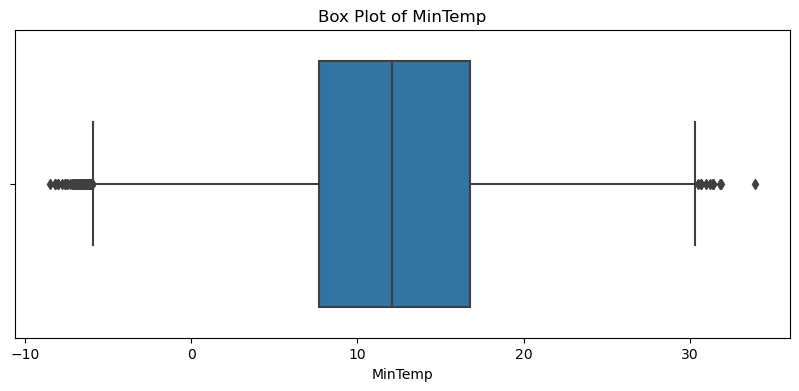

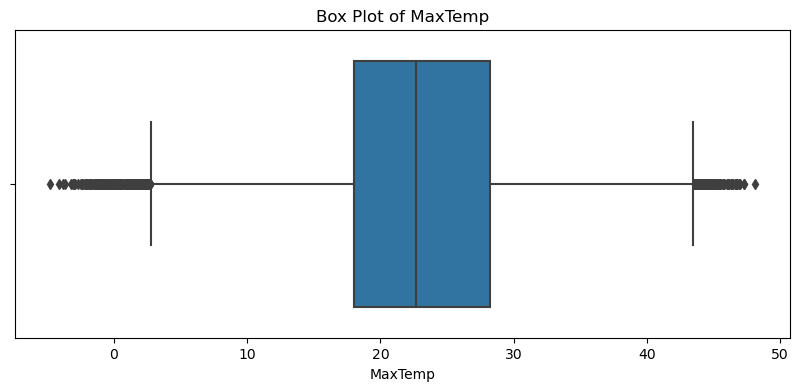

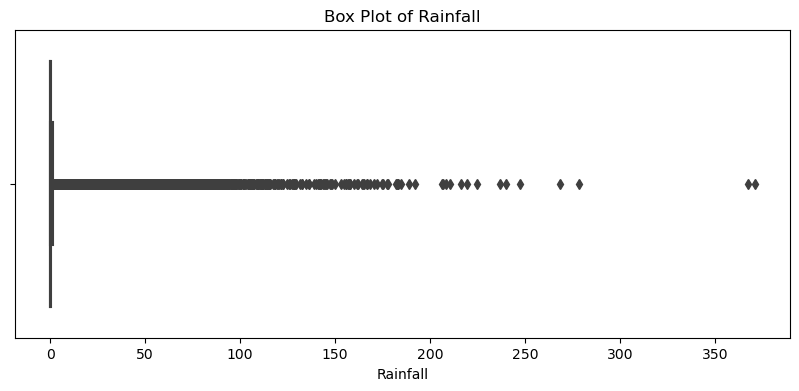

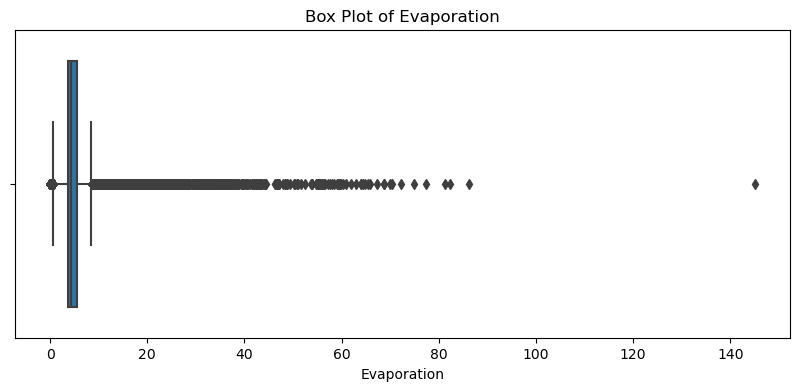

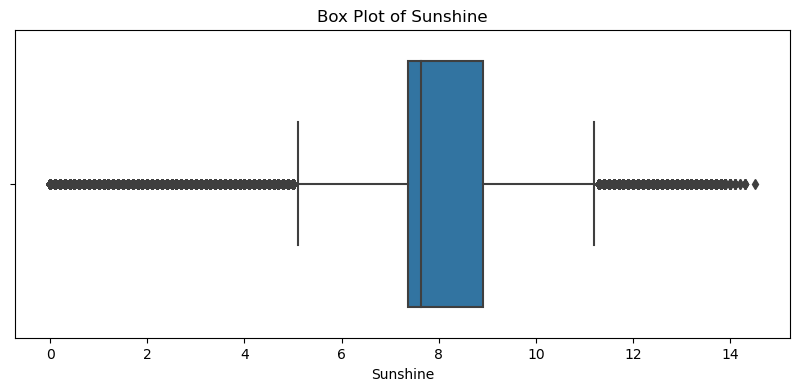

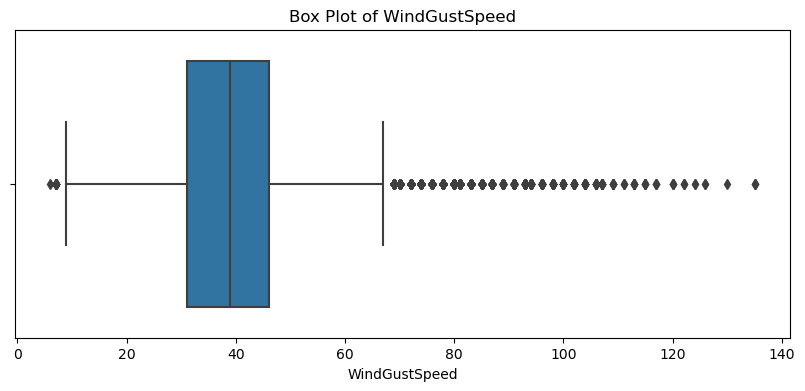

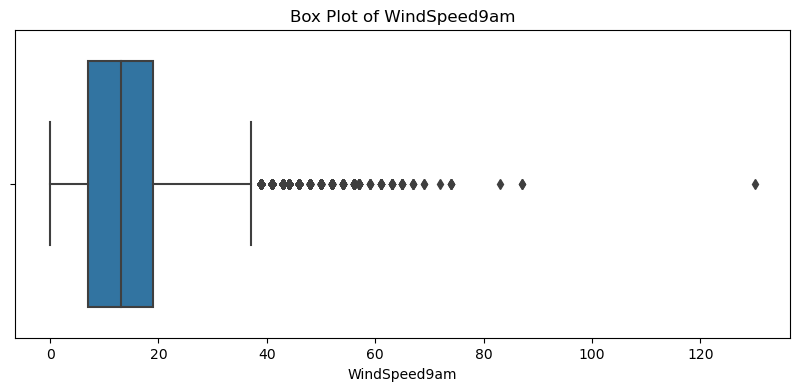

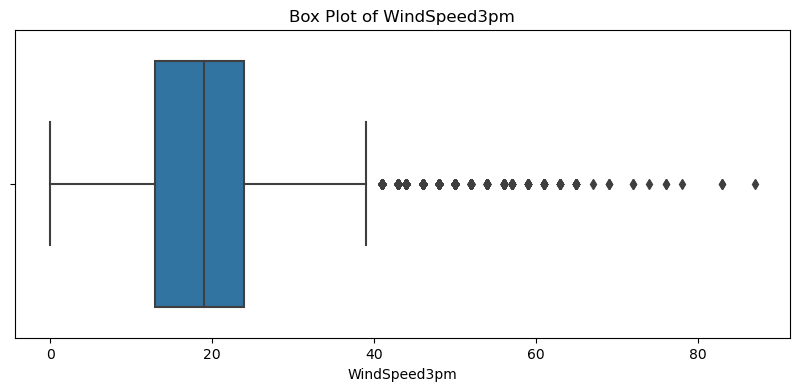

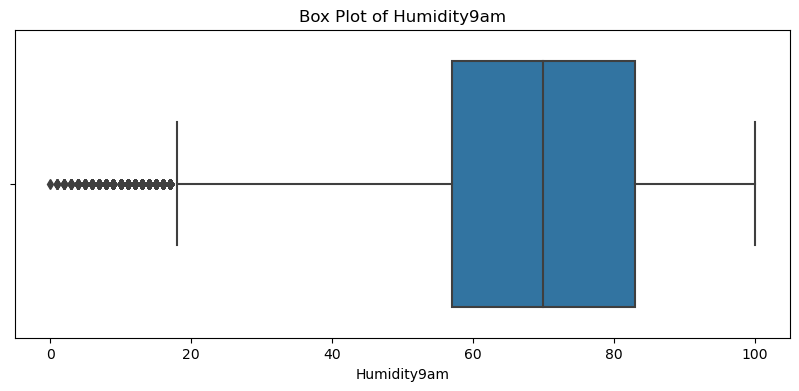

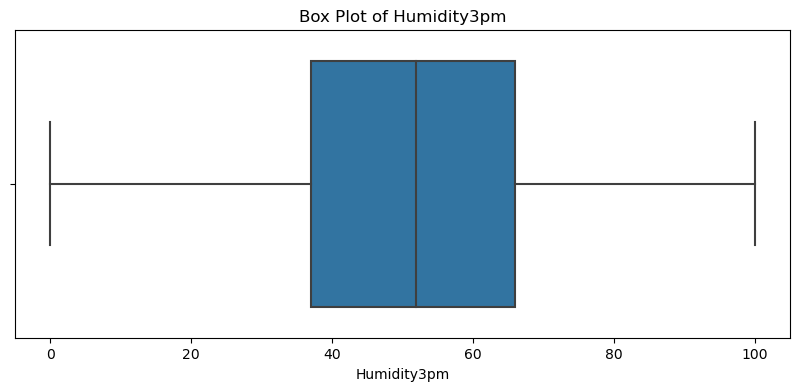

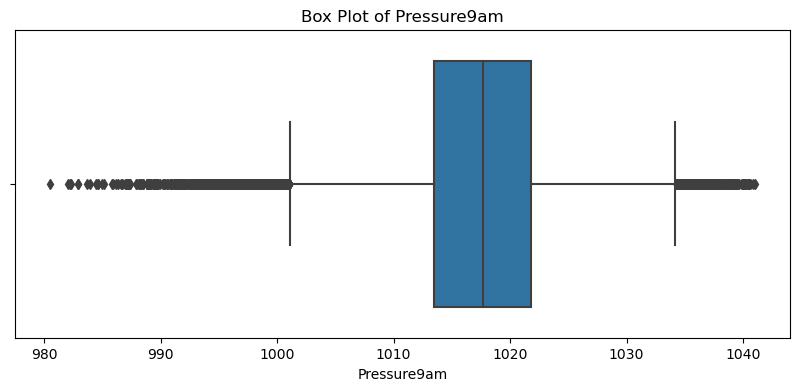

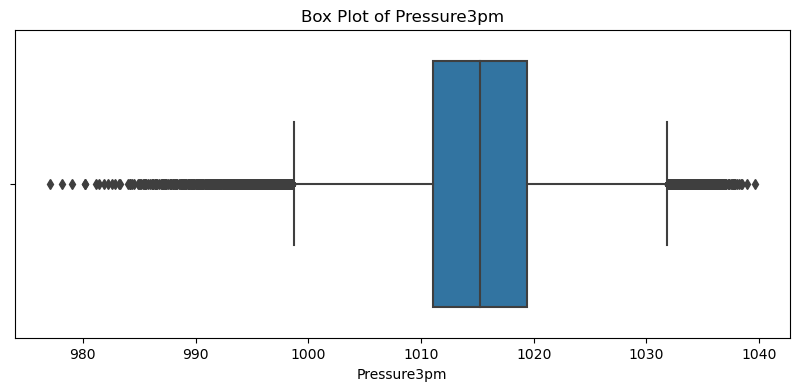

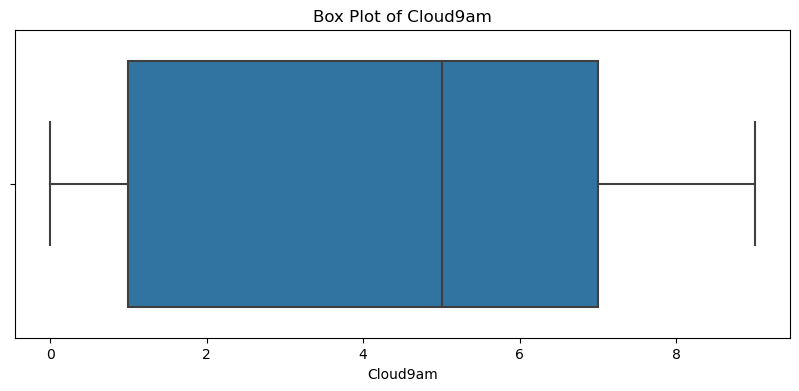

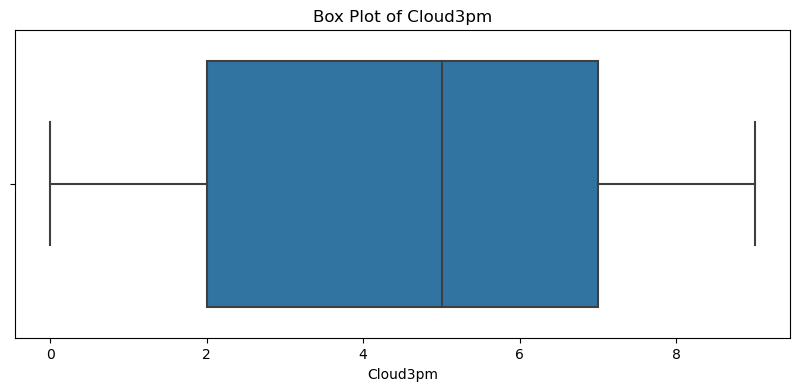

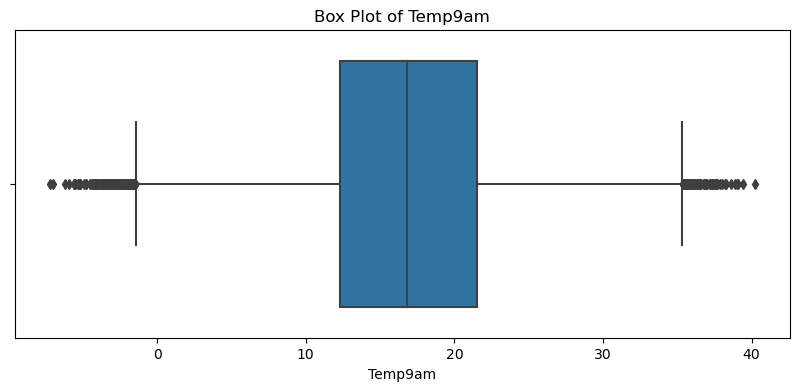

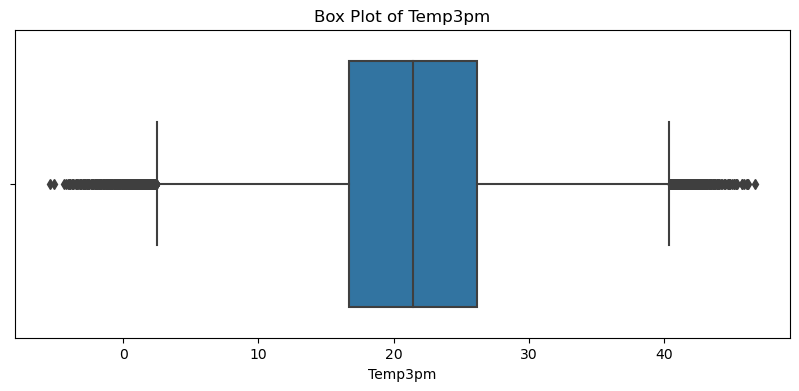

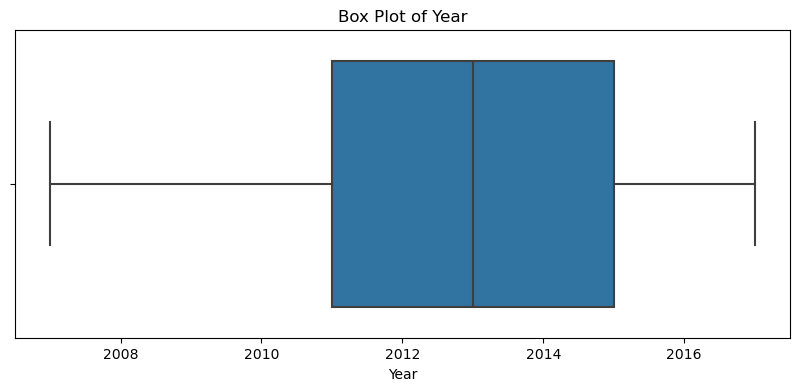

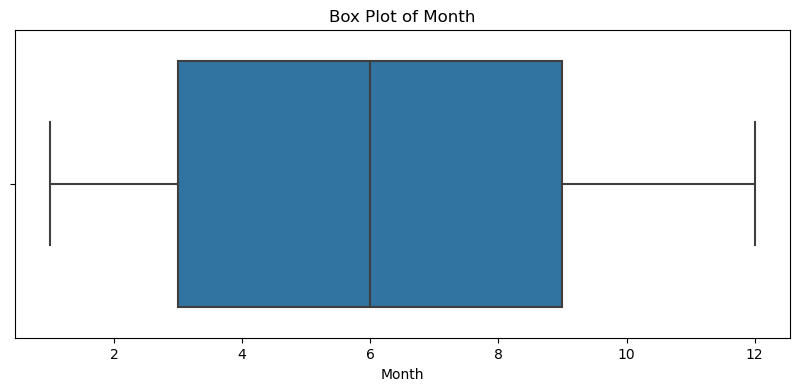

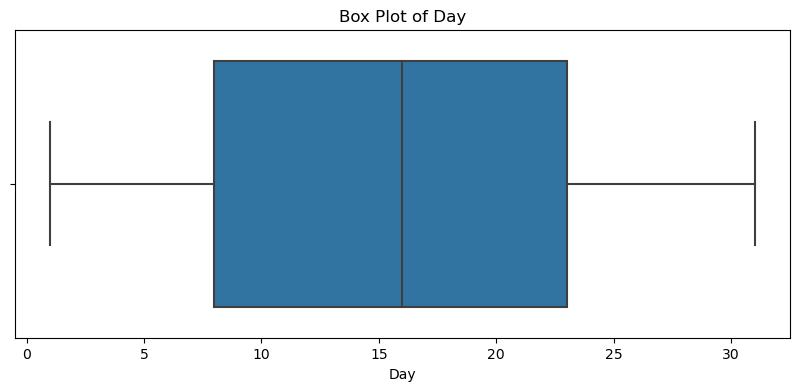

In [92]:
for column in numerical_df1.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=numerical_df1[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Feature Engineering

In [93]:
df1['TempChange'] = df1['Temp3pm'] - df1['Temp9am']

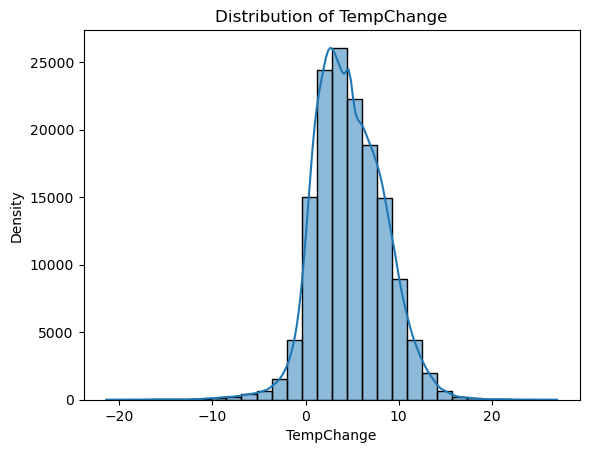

In [94]:
sns.histplot(df1['TempChange'], bins=30, kde=True)
plt.title('Distribution of TempChange')
plt.xlabel('TempChange')
plt.ylabel('Density')
plt.show()

In [95]:
df1['HumidityChange'] = df1['Humidity9am'] - df1['Humidity3pm']

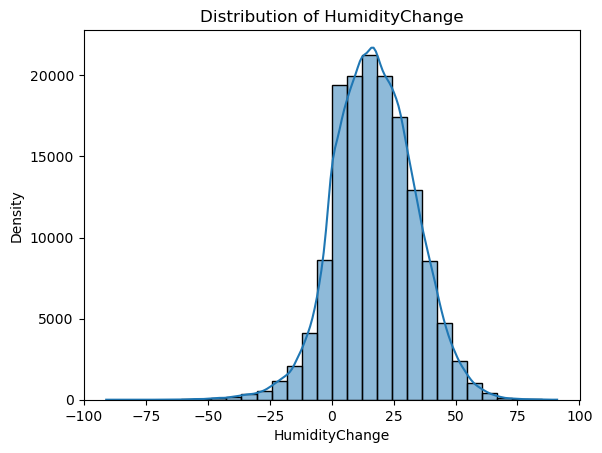

In [96]:
sns.histplot(df1['HumidityChange'], bins=30, kde=True)
plt.title('Distribution of HumidityChange')
plt.xlabel('HumidityChange')
plt.ylabel('Density')
plt.show()

In [97]:
df1['PressureChange'] = df1['Pressure9am'] - df1['Pressure3pm']

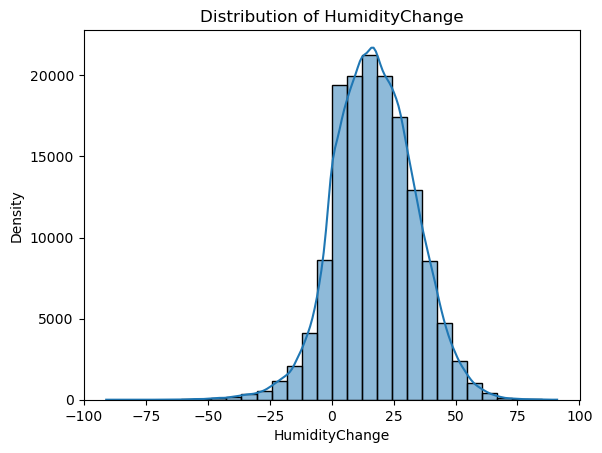

In [98]:
sns.histplot(df1['HumidityChange'], bins=30, kde=True)
plt.title('Distribution of HumidityChange')
plt.xlabel('HumidityChange')
plt.ylabel('Density')
plt.show()

# Model Development

In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encoding

#### labelEncoding

In [100]:
#label_encoder = LabelEncoder()
#categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
#for column in categorical_columns:
#    df1[column] = label_encoder.fit_transform(df1[column])

#### One Hot Encoding

In [106]:
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
df_encoded = pd.get_dummies(df1, columns=categorical_columns)

print(df_encoded.head())

        Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01     13.4     22.9       0.6          4.4  7.636766   
1 2008-12-02      7.4     25.1       0.0          4.4  7.636766   
2 2008-12-03     12.9     25.7       0.0          4.4  7.636766   
3 2008-12-04      9.2     28.0       0.0          4.4  7.636766   
4 2008-12-05     17.5     32.3       1.0          4.4  7.636766   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           44.0          20.0          24.0         71.0         22.0   
1           44.0           4.0          22.0         44.0         25.0   
2           46.0          19.0          26.0         38.0         30.0   
3           24.0          11.0           9.0         45.0         16.0   
4           41.0           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0       1007.7       1007.1       8.0       7.0     16.9     21.8   
1       1010.6

#### Target variable

In [133]:
X = df_encoded.drop(['Date', 'RainTomorrow'], axis=1)
y = df_encoded['RainTomorrow']

In [134]:
print(X)

        MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4  22.900000       0.6          4.4  7.636766           44.0   
1           7.4  25.100000       0.0          4.4  7.636766           44.0   
2          12.9  25.700000       0.0          4.4  7.636766           46.0   
3           9.2  28.000000       0.0          4.4  7.636766           24.0   
4          17.5  32.300000       1.0          4.4  7.636766           41.0   
...         ...        ...       ...          ...       ...            ...   
145455      2.8  23.400000       0.0          4.4  7.636766           31.0   
145456      3.6  25.300000       0.0          4.4  7.636766           22.0   
145457      5.4  26.900000       0.0          4.4  7.636766           37.0   
145458      7.8  27.000000       0.0          4.4  7.636766           28.0   
145459     14.9  23.221348       0.0          4.4  7.636766           41.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  P

In [135]:
print(y)

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainTomorrow, Length: 145460, dtype: object


#### Split the dataset into training and testing sets

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Default Model

In [151]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [152]:
y_pred = clf.predict(X_test)

In [153]:
print(y_pred)

['Yes' 'No' 'Yes' ... 'Yes' 'No' 'No']


In [154]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 79.0560978963289


In [155]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.86      0.87     22672
         Yes       0.52      0.54      0.53      6420

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



Tunning the parametes

In [159]:
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                             max_depth=10, min_samples_leaf=5, min_samples_split=20)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=20, random_state=100)

In [160]:
y_pred = clf1.predict(X_test)

In [161]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 83.82029423896604


In [162]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.94      0.90     22672
         Yes       0.69      0.48      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092

